# **Life Expectancy Prediction using Linear Regression**

# **Description**
This notebook demonstrates a Linear Regression (LR) model designed to accurately predict life expectancy (in years) using health, economic, and demographic factors. The analysis utilizes a cleaned dataset of 2,928 rows and 20 features, originally sourced from the World Health Organization (WHO).

## Data Loading & Pre-processing

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd #importing pandas library
#Read the CSV file and convert it to pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Datasets/Life Expectancy.csv")
#Print the total number of records in the dataframe
print("Number of rows in the dataframe: ", len(df))
#Print the first five records
print("\nThe first five rows in the dataframe are: ")
df.head()

Number of rows in the dataframe:  2928

The first five rows in the dataframe are: 


,Life expectancy,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#Print the shape of the dataset
print("The total number of rows and columns in the dataset")
print("rows: ", df.shape[0])
print("columns: ", df.shape[1])

The total number of rows and columns in the dataset
rows:  2928
columns:  20


### Checking the summary of the dataframe to understand the datatypes

In [7]:
#Print the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Status                           2928 non-null   object 
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2928 non-null   int64  
 4   Alcohol                          2928 non-null   float64
 5   percentage expenditure           2928 non-null   float64
 6   Hepatitis B                      2909 non-null   float64
 7   Measles                          2928 non-null   int64  
 8   BMI                              2928 non-null   float64
 9   under-five deaths                2928 non-null   int64  
 10  Polio                            2909 non-null   float64
 11  Total expenditure                2928 non-null   float64
 12  Diphtheria          

### Check if there are any null/missing values

In [8]:
#Print the names of features and the total number of missing values
df.isnull().sum()

,0
Life expectancy,0
Status,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,19
Measles,0
BMI,0
under-five deaths,0


### Drop rows with missing values

In [9]:
#Drop the rows that have missing values
df = df.dropna()

In [10]:
#Print the shape of the dataset after dropping the rows with missing values
print("The number of rows and columns after dropping the rows with missing values")
print("rows: ", df.shape[0])
print("columns: ", df.shape[1])

The number of rows and columns after dropping the rows with missing values
rows:  2909
columns:  20


### Checking for duplicates

In [11]:
#checking for duplicate values
print("Duplicate values in the dataset?",df.duplicated().any())

Duplicate values in the dataset? False


### Replace the ordinal categorical data with numerical values

In [12]:
#Ordinal encoding of categorical data with numerical values
#Developing = 0, Developed = 1
df['Status'] = df['Status'].replace({'Developing': 0, 'Developed': 1}).astype(int)

/tmp/ipython-input-2161764986.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status'] = df['Status'].replace({'Developing': 0, 'Developed': 1}).astype(int)


In [13]:
#print sample values after changing the status column
print("Printing five random samples from the dataset: ")
df.sample(5)

Printing five random samples from the dataset: 


,Life expectancy,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
610,63.9,0,274.0,7,0.01,0.000000,85.0,124,26.2,10,85.0,5.90,85.0,3.0,1100.000000,190000000.0,7.7,7.4,0.576,11.1
963,62.0,0,269.0,3,0.01,0.000000,98.0,0,25.4,5,98.0,6.12,98.0,1.4,1100.000000,190000000.0,7.8,7.7,0.440,8.8
262,69.5,0,184.0,0,6.85,549.809610,97.0,0,46.3,0,98.0,5.81,97.0,0.3,4258.788611,313929.0,3.5,3.4,0.700,12.7
2823,67.9,0,184.0,22,2.36,13.890212,91.0,2,39.3,25,98.0,5.92,98.0,0.3,182.286250,27328.0,3.1,3.1,0.644,11.9
1968,62.9,0,275.0,10,3.00,0.000000,67.0,38,48.6,12,74.0,6.00,73.0,0.6,1100.000000,7919825.0,1.3,1.3,0.515,10.0


### Correlation Matrix

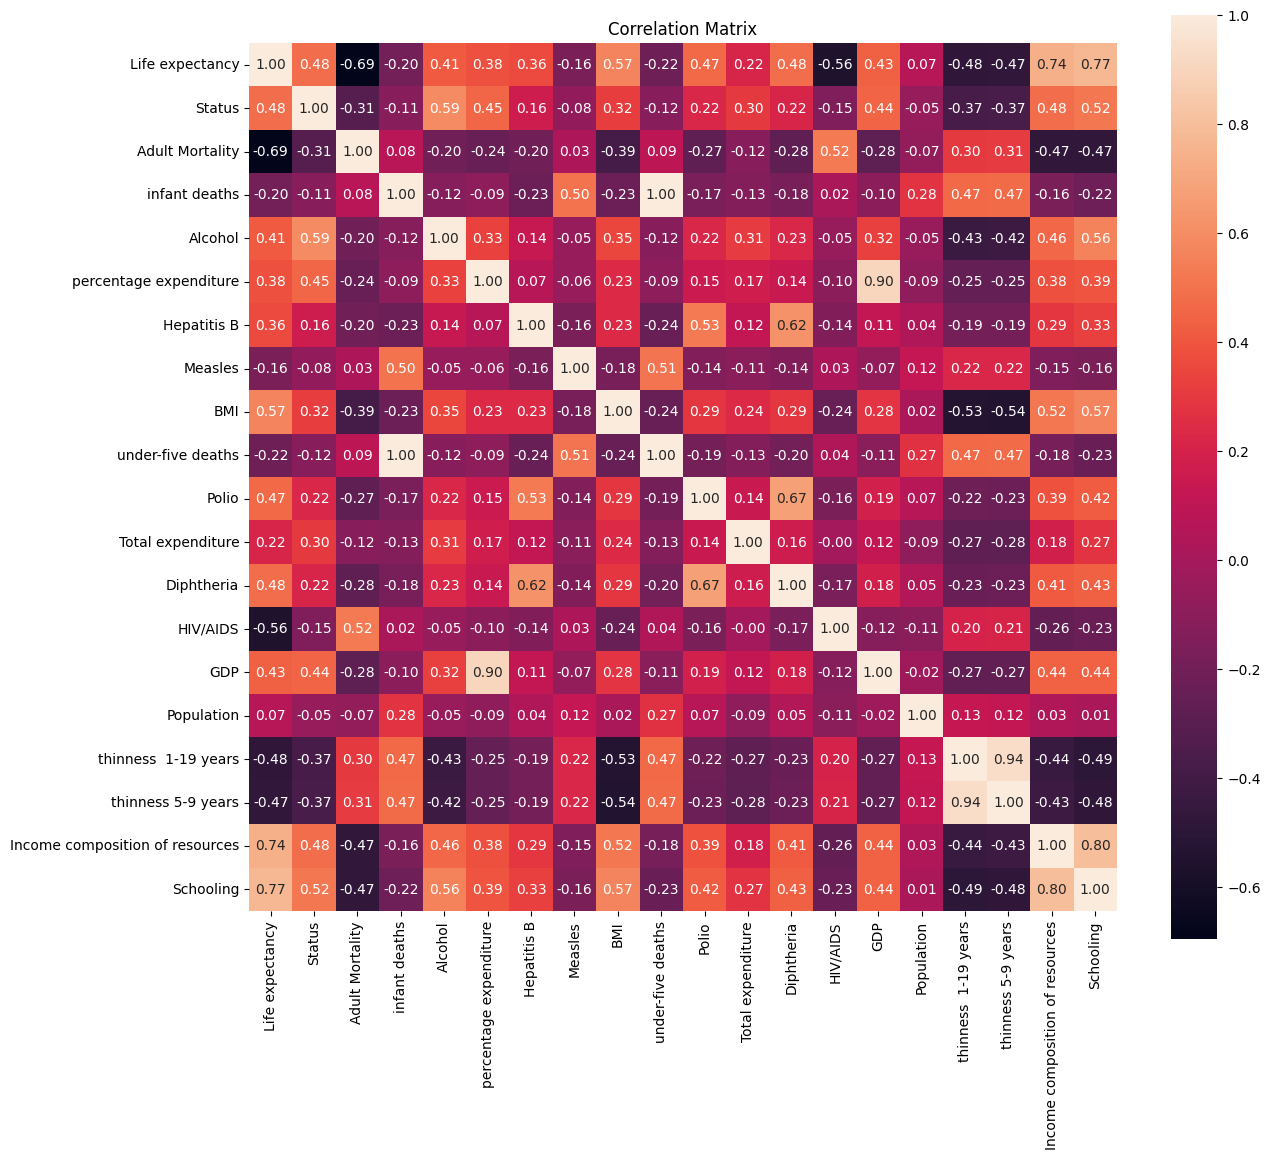

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#Computing the correlation matrix
corr_matrix = df.corr(numeric_only=True)
#Generating the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [15]:
#printing the correlation of features with respect to life expectancy
life_corr = corr_matrix['Life expectancy'].sort_values(ascending=False)
print(life_corr)

Life expectancy                    1.000000
Schooling                          0.770689
Income composition of resources    0.736936
BMI                                0.568102
Status                             0.482606
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.430741
Alcohol                            0.412648
percentage expenditure             0.381974
Hepatitis B                        0.360858
Total expenditure                  0.218134
Population                         0.072770
Measles                           -0.159975
infant deaths                     -0.197879
under-five deaths                 -0.223800
thinness 5-9 years                -0.472177
thinness  1-19 years              -0.477838
HIV/AIDS                          -0.557827
Adult Mortality                   -0.694567
Name: Life expectancy, dtype: float64


### Removing columns with very weak correlations (Measles and Population)

In [16]:
#Dropping featues with very weak correlation
df.drop(['Measles'], axis = 1, inplace = True)
df.drop(['Population'], axis = 1, inplace = True)

### Removing redundant features (infant deaths, thinness 5-9 years)

In [17]:
#Removing redundant columns
#Infant death is a subset of column - under-five deaths
df.drop(['infant deaths'], axis = 1, inplace = True)
#thinness 5-9 years is a subset of column - thinness  1-19 years
df.drop(['thinness 5-9 years'], axis = 1, inplace = True)

### Splitting dataframe to features (X) and labels (y)

In [18]:
#Splitting the dataframe to input and output data
X = df.drop(columns='Life expectancy')
y = df['Life expectancy']

In [19]:
#printing shape of the feature data
print("The number of rows and columns of the input data: " )
print("rows: ", X.shape[0])
print("columns: ", X.shape[1])

The number of rows and columns of the input data: 
rows:  2909
columns:  15


In [20]:
#printing shape of the output/label data
print("The number of rows of the label: " )
print("rows: ", y.shape[0])

The number of rows of the label: 
rows:  2909


### Creating train/test splits

In [21]:
from sklearn.model_selection import train_test_split
#split data into training and testing sets
#X = Feature data
#y = labels
#test_size = .1, means 10% data for testing and 90% for training
#random state to ensure reproducibility in the data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
#print the first five rows of the X_train split
X_train.head(5)

,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
685,1,68.0,11.68,1128.050886,88.0,53.8,0,98.0,6.12,98.0,0.1,16372.291520,0.9,0.805,12.5
1732,0,113.0,6.56,666.737437,91.0,59.7,0,95.0,6.92,95.0,0.1,7318.742449,1.9,0.792,15.1
1397,0,86.0,0.01,2009.575605,99.0,68.4,1,98.0,2.76,98.0,0.1,38497.616960,3.3,0.790,13.5
807,0,172.0,0.24,0.000000,97.0,55.5,65,97.0,4.82,97.0,0.1,1100.000000,3.1,0.651,11.9
233,0,243.0,12.60,364.426052,98.0,57.2,1,97.0,6.34,99.0,0.1,3848.215966,2.2,0.723,14.6


In [23]:
# print the shape of the training dataset
X_train.shape

(2618, 15)

In [24]:
#print the first five rows of the y_train split
y_train.head(5)

,Life expectancy
685,78.4
1732,75.4
1397,74.0
807,69.8
233,68.9


In [25]:
#Generating descriptive statistics
print("The statistics of the features in the dataset: ")
X_train.describe()

The statistics of the features in the dataset: 


,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
count,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
mean,0.177998,164.002292,4.664257,743.998498,79.447517,38.245149,43.018717,82.578686,5.922296,82.160428,1.777922,6607.893890,4.886249,0.630113,12.034683
std,0.382585,124.340449,3.983079,1961.736052,24.342521,19.891422,165.169278,23.334604,2.402869,23.911205,5.160483,13336.119637,4.444141,0.202201,3.210937
min,0.000000,1.000000,0.010000,0.000000,1.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.000000,0.000000
25%,0.000000,74.000000,1.112500,5.380150,75.000000,19.500000,0.000000,78.000000,4.340000,78.000000,0.100000,583.723224,1.600000,0.492000,10.100000
50%,0.000000,143.000000,4.000000,67.705459,88.400000,43.000000,4.000000,93.000000,5.900000,93.000000,0.100000,1174.977720,3.400000,0.678000,12.400000
75%,0.000000,225.000000,7.707500,456.429116,96.000000,56.100000,27.000000,97.000000,7.340000,97.000000,0.800000,4944.982220,7.200000,0.777000,14.200000
max,1.000000,723.000000,17.870000,19099.045060,99.000000,77.100000,2500.000000,99.000000,17.600000,99.000000,50.300000,119172.741800,27.700000,0.948000,20.700000


### Identifying highly skewed features

In [26]:
#detect skewness on the training set
#skewness check not done on the testing dataset as that would cause data leakage
#numeric feature list identified from the analysis of X_train.describe() above
numeric_features = ['Adult Mortality', 'percentage expenditure', 'under-five deaths', 'HIV/AIDS', 'GDP', 'thinness  1-19 years']
skewness = X_train[numeric_features].skew()
#|skewness| < 0.5 → fairly symmetric
# 0.5 ≤ |skewness| < 1 → moderately skewed
# |skewness| ≥ 1 → highly skewed, transform.
skewed_features = skewness[skewness >= 1].index
print("Skewed features:", list(skewed_features))

Skewed features: ['Adult Mortality', 'percentage expenditure', 'under-five deaths', 'HIV/AIDS', 'GDP', 'thinness  1-19 years']


### Log-transform skewed features

In [27]:
import numpy as np
#taking copy of train and test data
X_train_log = X_train.copy()
X_test_log = X_test.copy()

#Log-transform skewed features in train and test data
# Log transform (log1p handles zero values safely)
for col in skewed_features:
    X_train_log[col] = np.log1p(X_train_log[col])
    X_test_log[col] = np.log1p(X_test_log[col])

### Data Normalisation using MinMaxScalar

In [28]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
scaler = MinMaxScaler()
# transform training data
X_train_scaled = scaler.fit_transform(X_train_log)
# transform testing data
X_test_scaled = scaler.transform(X_test_log)

## Model Training

### Linear Regression Baseline Model (using default parameters)

In [29]:
from sklearn.linear_model import LinearRegression
# Create an instance of the Linear Regression model
lr = LinearRegression()
# Train (fit) the model using the scaled training features and training labels
lr.fit(X_train_scaled, y_train)
# Evaluate the model performance using R² score (coefficient of determination)
# R² score on training data
print("Train R² with LR:",lr.score(X_train_scaled, y_train))
# R² score on testing data
print("Test R² with LR:", lr.score(X_test_scaled, y_test))

Train R² with LR: 0.8580412291303936
Test R² with LR: 0.8623476814139354


### 5 fold Cross Validation

In [30]:
from sklearn.model_selection import KFold
#set 5-fold cross validation after shuffle the dataset with random seed 42
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

### Linear Regression with 5 Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# define a LR model with default parameter setting
lr = LinearRegression()
# run the previously defined 5-fold validation on the dataset
results = cross_val_score(lr, X_train_scaled, y_train, cv=kfold)
print("Results of individual runs: ", results)
# print the average r squared scores
print("Average R2 score of LR:",results.mean())

Results of individual runs:  [0.86273512 0.88229555 0.82541766 0.8566875  0.84948525]
Average R2 score of LR: 0.8553242164689003


### Hyperparameter Tuning of Linear Regression Model

In [32]:
from sklearn.model_selection import GridSearchCV

# fine tune parameters for lr model
grid_params_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr = LinearRegression()
gs_lr_result = GridSearchCV(lr, grid_params_lr, scoring='r2', refit=True, cv=kfold, n_jobs=-1).fit(X_train_scaled, y_train)
print("The best R2 score is: ", gs_lr_result.best_score_)
# check the parameter setting for the best selected model
print("The best parameters for LR are: ", gs_lr_result.best_params_)

The best R2 score is:  0.8553242164689003
The best parameters for LR are:  {'fit_intercept': True, 'positive': False}


### Evaluate the trained Linear Regression model using testing dataset

In [33]:
# use the best model and evaluate on testing set
lr_test_R2 = gs_lr_result.best_estimator_.score(X_test_scaled, y_test)
print("R2 of LR in testing:", lr_test_R2)

R2 of LR in testing: 0.8623476814139354


### Comparing Actual Vs Predicted labels using LR model

In [35]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
# Make predictions on the test set
y_pred = gs_lr_result.predict(X_test_scaled)


# Combine actual and predicted into a DataFrame
results_df = pd.DataFrame({
    'Actual': y_test[:5].values,
    'Predicted': y_pred[:5]
})

# print the results
print(results_df)

# Calculate evaluation metrics
print("R2 score for test data with LR:", r2_score(y_test, y_pred))
print("RMSE with LR: ", root_mean_squared_error(y_test, y_pred))

   Actual  Predicted
0    76.3  78.578850
1    74.1  73.276829
2    72.8  76.685102
3    74.7  73.940348
4    61.0  68.136006
R2 score for test data with LR: 0.8623476814139354
RMSE with LR:  3.4255685112360403
